In [ ]:
#!pip install cufflinks plotly

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
font_title = 25
font_label = 15
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [4]:
path_data = '../data/'

In [6]:
df_febr = pd.read_csv(path_data + 'Февраль_с_назв_тов.csv', sep=';')
df_march = pd.read_csv(path_data + 'Март_с_назв_тов.csv', sep=';')
df_apr = pd.read_csv(path_data + 'Апрель_с_назв_тов.csv', sep=';')
df_may = pd.read_csv(path_data + 'Май_с_назв_тов.csv', sep=';')

In [7]:
# Собираем все месяцы в один датафрейм
df = pd.concat([df_febr, df_march, df_apr, df_may])

In [18]:
# Убираем лишнии пробелы впереди и вконце названий
df['name_tov'] = df['name_tov'].apply(lambda s: s.strip() if type(s)==str else s)
df['name_gr'] = df['name_gr'].apply(lambda s: s.strip() if type(s)==str else s)
df['name_gr2'] = df['name_gr2'].apply(lambda s: s.strip() if type(s)==str else s)

In [19]:
df['name_gr'].value_counts()

Молочная Продукция                3453689
Овощи. Фрукты. Грибы. Зелень      2884746
Кулинария                         2483843
Хлеб                              1608133
Сладости, кондитерские изделия    1472920
                                   ...   
Довериум                                2
Рационы                                 2
Кулинарный конструктор                  1
Подарки и сувениры                      1
ДаркКитчен                              1
Name: name_gr, Length: 71, dtype: int64

In [8]:
# Сохраняем этот общий фаил
df.to_csv(path_data + '4_месяца.csv', sep=';', index=False)

In [20]:
# Для каждого магазина сформируем свой файл
lict_shop = df.id_tt_cl.unique()

for id_shop in lict_shop:
    df_shop = df[df['id_tt_cl']==id_shop]
    df_shop.to_csv(path_data+f'shop/{str(id_shop)}.csv',  sep=';', index=False)

In [4]:
# df = pd.read_csv(path_data + '4_месяца.csv', sep=';')

**Можно тут поработать с общим файлом, но он тяжелый. Или в другом файле с конкретным магазином**

In [5]:
df['date_ch'] = pd.to_datetime(df['date_ch'], format='%Y-%m-%d')

(15963722, 13)

In [23]:
df = df.set_index(pd.DatetimeIndex(df['date_ch']))

In [24]:
df_otr_11398 = df[df['id_tt_cl']==11398].copy()
df_otr_11616 = df[df['id_tt_cl']==11616].copy()
df_otr_11732 = df[df['id_tt_cl']==11732].copy()
df_otr_11939 = df[df['id_tt_cl']==11939].copy()
df_otr_12020 = df[df['id_tt_cl']==12020].copy()
df_otr_14975 = df[df['id_tt_cl']==14975].copy()
df_otr_15194 = df[df['id_tt_cl']==15194].copy()
df_otr_15372 = df[df['id_tt_cl']==15372].copy()

In [20]:
df_otr_11398['BaseSum'].resample('7d').sum()

date_ch
2022-03-01   2,578,599.14
2022-03-08   2,364,098.75
2022-03-15   2,408,200.60
2022-03-22   2,380,285.45
2022-03-29   2,487,514.62
2022-04-05   2,458,966.48
2022-04-12   2,509,311.05
2022-04-19   2,458,604.13
2022-04-26   2,252,021.31
2022-05-03   2,167,571.14
2022-05-10   2,538,079.64
2022-05-17   2,518,634.07
2022-05-24   2,400,002.40
2022-05-31     353,322.32
Freq: 7D, Name: BaseSum, dtype: float64

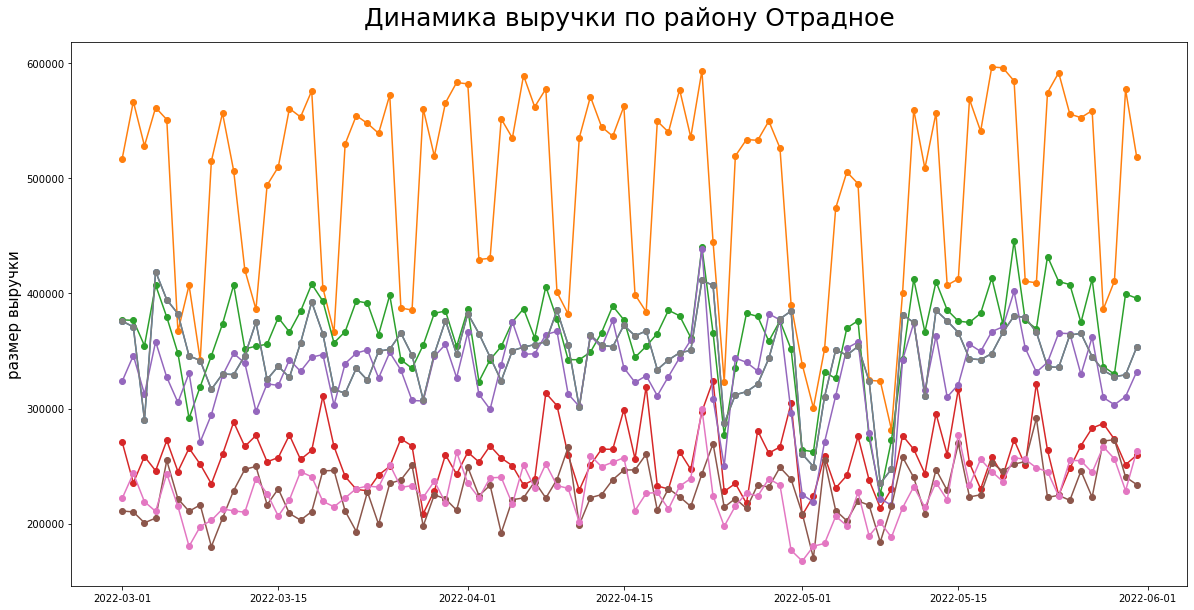

In [41]:
plt.figure(figsize=(20, 10))
plt.title('Динамика выручки по району Отрадное', fontsize=font_title, y=1.02)
plt.plot(df_otr_11398['BaseSum'].resample('d').sum(),  marker='o', label='11398 - 223 кв.м.')
plt.plot(df_otr_11616['BaseSum'].resample('d').sum(),  marker='o', label='11616 - 119.7  кв.м.')
plt.plot(df_otr_11732['BaseSum'].resample('d').sum(),  marker='o', label='11732 - 115.5  кв.м.')
plt.plot(df_otr_11939['BaseSum'].resample('d').sum(),  marker='o', label='11939 - 271  кв.м.')
plt.plot(df_otr_12020['BaseSum'].resample('d').sum(),  marker='o', label='12020 - 157.8  кв.м.')
plt.plot(df_otr_14975['BaseSum'].resample('d').sum(),  marker='o', label='14975 - 218  кв.м.')
plt.plot(df_otr_15194['BaseSum'].resample('d').sum(),  marker='o', label='15194 - 153  кв.м.')
plt.plot(df_otr_11398['BaseSum'].resample('d').sum(),  marker='o', label='11398 - 171.6  кв.м.')
plt.ylabel('размер выручки', fontsize=font_label)
# plt.legend(loc='lower left', fontsize=font_label)
plt.show()



In [43]:
df_otr_11398['BaseSum'].resample('d').sum().shape

(92,)

разложение на тренд, сезонность и шум м-н "11398"


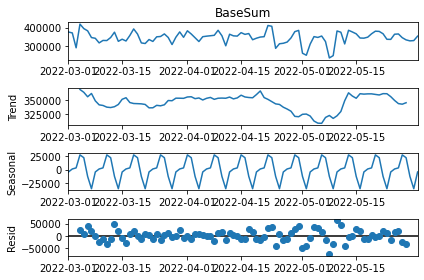

In [50]:
print('разложение на тренд, сезонность и шум м-н "11398"')
decomposition = seasonal_decompose(df_otr_11398['BaseSum'].resample('d').sum(), model='additive')
decomposition.plot()
plt.show()

In [54]:
df_otr_11398.groupby('name_gr')['BaseSum'].sum()

name_gr
Айс ВкусВилл                                        40,584.41
Алкоголь                                           378,237.01
Архив                                               81,520.53
Бакалея                                          1,330,629.61
Бытовая Химия                                       96,618.39
ВВ Праздник                                          1,891.97
Выбор покупателя                                       193.33
Гастрополка                                            701.25
Детские товары                                     168,317.09
Детское питание                                    166,265.58
Замороженные десерты                               480,612.11
Замороженные продукты                            1,055,741.78
Кафе                                             2,033,872.38
Консервация                                        536,108.45
Косметика                                          220,568.68
Кулинария                                        4,123,277.11


In [56]:
df_otr_11398.isna().sum()

CheckUID          0
id_tt_cl          0
id_tov_cl         0
Price_retail      1
Quantity          0
BasePrice         0
BaseSum           0
date_ch           0
time_ch           0
order_type        0
name_tov        269
name_gr         269
name_gr2        269
dtype: int64